# Murder Accountability Project: Homicide <a id="title-1"></a>

##### Index <a id="index"></a>
1. <a href="#business-understanding">Business Understanding</a>
2. <a href="#data-meaning">Data Meaning</a>
3. <a href="#data-quality">Data Quality</a>
4. <a href="#new-feature-creation">New Feature Creation</a>
5. <a href="#simple-statistics">Simple Statistics</a>
6. <a href="#visualizations">Visualizations</a>
7. <a href="#exploratory-data-analysis">Exploratory Data Analysis</a>
8. <a href="#discoveries">Discoveries</a>
9. <a href="#exceptional-work">Exeptional Work</a>

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## 1. Business Understanding <a id="business-understanding">
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific. https://www.law.cornell.edu/wex/murder

We have been hearing many news about homicide lately in the mids of already existing Covid-19 pandemic. Violent crime and homicide have been rising saliently across the US. The number of homicide has almost increase by double digits in many bigger cities such has Chicago, New York, Philadelphia just to name few. To have better understanding about criminal and victim profile , to visualize some interesting relation and to make prediction on if the kind of homicide has been solved or unsolved we decided to pick homicide as a topic for our project.

Just to define simply, homicide is the killing of one person by another. Homicide might or might not be illegal. Legal homicide could be such as person killing intruders without committing crime or solders killing enemies in battle, while the illegal homicide is an intentional murder of one individual by another or if someone involves in the activities. Our data set has two types of crime: Murder or Manslaughter and Manslaughter by Negligence. Murder occurs when one human being unlawfully kills another human being. Murder are broken into degrees, First degree which is willful, deliberate and premeditated murder. Second-degree murder- which do not carry the death penalty. Manslaughter is the act of killing another human being in a way that is less accountable than murder. In other words manslaughter is not as sever crime as murder. Manslaughter is categorized into voluntary and involuntary manslaughter. Voluntary manslaughter is defined as killing of another human being under extreme provocation which typically does not require an intent to kill. For example an individual who kills another individual in self-defense may be charged with voluntary manslaughter if he was the original attacker in the situation. While involuntary manslaughter is defined as death of another human being due to act of negligence or recklessness of the defendant.For example, a person who drives under the influence of alcohol may hit and kill a pedestrian, although killing him was not his intention.

United States does a poor job in tracking and accounting for its unsolved homicides. According to Scripps Howard News Service study of the FBI’s Uniform Crime Report, across U.S. nearly 185,000 cases of homicides and non-negligent manslaughter were unsolved from 1980 to 2008. The rate at which police clear homicides through arrest has declines year over year. About 4 of every 10 homicides go unsolved each year.As per FBI Uniform Crime Report, currently on average, 40 percent of homicides are unsolved. These rising number of unsolved homicides also known as cold case is a major problem to our society as well as law enforcement as its leaving a growing number of killers out on the streets, undermining the safety in urban neighborhoods and also crumbling the confidence in the criminal justice system.

No one knows all the names of the murder victims because no law enforcement agency in America is assigned to monitor failed homicide investigations by local police departments. Even the official national statistics on murder are actually estimates and projections based upon incomplete reports by police departments that voluntarily choose (or refuse) to participate in federal crime reporting programs.

keeping all these in mind our primary key in this project is to help classify the cases solved or unsolved based on the data we have.

Our dataset come from the Murder Accountability Project which is a nonprofit group organized in 2015 to educate American on the important of accurately accounting for unsolved homicides. Their projects board of directory is composed of retired law enforcement investigators, investigative journalists, criminologists and other experts on various aspects of homicide.

### 1.1 Purpose <a id='purpose'></a> 
<div style="text-align: right"> <a href="#business-understaning">Business Understanding</a> </div>
Describe the purpose of the data set you selected (i.e., why was this data collected in
the first place?). 

### 1.2 Data Mining <a id='data-mining'></a>
<div style="text-align: right"> <a href="#business-understaning">Business Understanding</a> </div>
Describe how you would define and measure the outcomes from the
dataset. That is, why is this data important and how do you know if you have mined
useful knowledge from the dataset? 

### 1.3 Algorithm Effectiveness <a id='algorithm-effectiveness'></a>
<div style="text-align: right"> <a href="#business-understaning">Business Understanding</a> </div>
How would you measure the effectiveness of a
good prediction algorithm? Be specific.

In [2]:
# IMPORT LIBRARIES
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# all imported libraries used for analysis
import numpy as np
import pandas as pd 
import os 
import urllib
import copy
import plotly 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.api as sm
import random
import random

from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from datetime import datetime
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# set color scheme and style for seaborn
sns.set(color_codes=True)
sns.set_style('whitegrid')

ModuleNotFoundError: No module named 'geopy'

In [3]:
# READ IN THE DATAFRAME
df=pd.read_csv('/Users/ghimirek/Desktop/ML_database.csv')

## 2. Data Meaning Type <a id='data-meaning'></a>
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>

In [4]:
# print the number of records and columns
records = len(df)
attributes = df.columns
print(f'No. of Records: {records} \nNo. of Attributes: {len(attributes)}')

No. of Records: 638454 
No. of Attributes: 24


In [20]:
df_description = pd.read_excel('../Data/data_description.xlsx')
pd.set_option('display.max_colwidth', 0)
df_types = pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index().rename(columns={'index': 'Attributes'})
df_description = pd.merge(df_description, df_types, on='Attributes', how='inner')
df_description

,Attributes,Description,Data Type
0,Record ID,"Unique record identifier generated by MAP based upon the YEAR, MONTH, INCIDENT and ORI code in the report.",int64
1,Agency Code,Unique Agency identifier.,object
2,Agency Name,The alphanumeric variable describing the name of the law enforcement agency making the report.,object
3,Agency Type,The type of law enforcement agency making the report. (e.g. Sheriff),object
4,City,Alphanumeric variable describing the original FBI naming and abbreviating scheme for the city of the reporting agency.,object
5,State,Alphanumeric variable describing the original FBI naming and abbreviating scheme for the state of the reporting agency.,object
6,Year,Year of homicide (or when victim’s body was recovered.) Numeric four digit. (F4.0).,int64
7,Month,The month of homicide occurrence or when the victim’s body was recovered.,object
8,Incident,A three-digit number describing the case number within the month in which a homicide occurred.,int64
9,Crime Type,"An alphanumeric variable defining whether the report was ""Murder or Nonnegligent manslaughter” or “Manslaughter by Negligence.”",object


## 3. Data Quality <a id='data-quality'></a>
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>

In [24]:
pd.set_option('display.max_columns', 28) # displays all columns 

### 3.1 Missing Data <a id='missing-data'></a>
<div style="text-align: right"> <a href="#data-quality">Data Quality</a> </div>
All missing data is categorized at 'unknown' or another designated category (e.g. 998 for age) prior to the data load. As noted in the data meaning above, the missing data generally indicates that the perpetrator or victim is unknown at the time of the homicide reporting.
<br><br>
Indicated in the output below, there are no columns with null values.

In [5]:
# check for nulls and put into a dataframe
df_null = pd.DataFrame(df.isnull().sum(), columns=['null_count'])

# filter on null counts that are not 0
df_null.loc[df_null['null_count'] != 0]

,null_count


While no nulls were present, the data has ' ' as a value, which is replaced with 998 to indicate unknown. Considering that there is only one record which matches this criteria, it is concluded to be a data entry error.

In [6]:
blank_index = df.loc[df['Perpetrator Age']== ' '].index.values[0]
df.at[blank_index, 'Perpetrator Age'] = '998'

Another caveat discovered is when the perpetrator's age is 0, the translation to a child under the age of 1 commiting homicide has little credibility. When filtering for records matching the scenario, majority return the remainder of the perpetrator's demographics as unknown. This indicates that the age of the perpetrator is likely unknown, rather than below one year of age.

In [7]:
df.loc[df['Perpetrator Age']== '0'].head(1)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
622595,622596,TX22012,Fort Worth,Municipal Police,Tarrant,Texas,2012,December,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Knife,0,0,FBI


In [ ]:
# df['Perpetrator Age']=df['Perpetrator Age'].replace(to_replace=0,value=df['Perpetrator Age'].median())

### 3.2 Duplicate Data <a id='duplicate-data'></a>
<div style="text-align: right"> <a href="#data-quality">Data Quality</a> </div>
Although duplicates are not present in the dataset (table below), it should be noted that perpetrators that collected more than one victim would also have a unqiue record. This indicates that the count of records will produce the accurate number of victims, rather than the sum of additional victims in addition to the number of observations.

In [10]:
# check for rows containing duplicate data and clean-up duplicate rows
df_duplicates = df.groupby(df.columns.tolist(),as_index=False).size()



In [14]:
len_instances = len(df['Record ID'])

In [19]:
set_intances=len(set(df['Record ID']))  

In [22]:
# check if there are any duplicate in dataset
# create function that checks duplicate
# take parameter name p_Agency Code
# if duplicate return true else return false
def checkDuplicate (len_instances):
    '''check if give list contains any duplicates'''
    if len_instances == set_intances:
        return False
    else:
        return True
# lets check if duplicate instances are present
dup_result = checkDuplicate (len_instances)
if dup_result:
    print('YES,duplicate instances present')
else:
    print('NO, duplicate instances are present')


NO, duplicate instances are present


### 3.1 Outlier Data <a id='outlier-data'></a>
<div style="text-align: right"> <a href="#data-quality">Data Quality</a> </div>

## 4. New Feature Creation <a id='new-feature-creation'></a>
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>
Due to the vast number of categories per variable, the attributes were further bucketed into more general groups to reduce complexity. 

1. Bucketing the age groups
2. Combining race and ethnicity
3. Combine city and state
4. Combine month and year
5. Binning relationships

In [25]:
# binning age
age_bins = np.array([0,10,20,30,40,50,60,70,80,90,100,998])
age_labels = ['0-10', '11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90', '91-100', '998']
df["Victim_Age_Group"] = pd.cut(df['Victim Age'].astype(int), age_bins, labels=age_labels, include_lowest=True)
df['Perpetrator_Age_Group'] = pd.cut(df['Perpetrator Age'].astype(int), age_bins, labels=age_labels, include_lowest=True)

In [66]:
# combine Victim and Perpetrator Race & Ethnicity into new features - Victim_Race_Ethnicity and Perpetrator_Race_Ethnicity
df['Victim_Race_Ethnicity'] = df['Victim Race'] + ', ' + df['Victim Ethnicity']
df['Perpetrator_Race_Ethnicity'] = df['Perpetrator Race'] + ', ' + df['Perpetrator Ethnicity']

In [63]:
# combine City and State into a new feature - City_State
df['City_State'] = df['City'] + ', ' + df['State']

# combine Month and Year into a new feature - Month_Year
df['Month_Year'] = pd.to_datetime(df['Year'].astype(str)  + df['Month'], format='%Y%B')


In [27]:
relationship_dict = {
    'Partner': ['Wife', 'Girlfriend', 'Ex-Husband', 'Husband', 'Ex-Wife', 'Boyfriend', 'Common-Law Husband','Common-Law Wife', 'Boyfriend/Girlfriend'],
    'Parent': ['Father','In-Law','Mother','Stepfather','Stepmother'],
    'Children': ['Daughter', 'Son', 'Stepdaughter','Stepson'],
    'Sibling': ['Brother', 'Sister'],
    'Work': ['Employee', 'Employer']
}
df['Relationship_Group'] = df['Relationship']

rel_replace = [[key for key, value in relationship_dict.items() if val in value][0] if len([key for key, value in relationship_dict.items() if val in value]) >0 else val for val in df['Relationship_Group']]
df['Relationship_Group'] = rel_replace



### 4.1 Data Wrangling <a id='data-wrangling'></a>
<div style="text-align: right"> <a href="#new-feature-creation">New Feature Creation</a> </div>

In [38]:
# data wrangling, clean-up, rename headers, drop columns, change data types, and transforms
# change crime solved values - Yes = 1 and No = 0 
df['Crime Solved']=df['Crime Solved'].replace(to_replace='No',value=0)
df['Crime Solved']=df['Crime Solved'].replace(to_replace='Yes',value=1)

In [41]:
#  converting the Perpetrator_Age into numeric
df['Perpetrator Age']=pd.to_numeric(df['Perpetrator Age']) 

In [42]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 27 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null int64
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null int64
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    638454

As you can see that the Perpetrator Age has been converted into numeric value 


In [44]:
# replace all the -1  values with nan  to later replace with median 
df = df.replace(to_replace=998,value=np.nan)

In [45]:
df.isnull().values.any()  # check for  NaN  values 

True

In [47]:
df.isnull().sum() #   display  the number  NaN values 

Record ID                  1
Agency Code                0
Agency Name                0
Agency Type                0
City                       0
State                      0
Year                       0
Month                      0
Incident                  16
Crime Type                 0
Crime Solved               0
Victim Sex                 0
Victim Age               974
Victim Race                0
Victim Ethnicity           0
Perpetrator Sex            0
Perpetrator Age            1
Perpetrator Race           0
Perpetrator Ethnicity      0
Relationship               0
Weapon                     0
Victim Count               0
Perpetrator Count          0
Record Source              0
Victim_Age_Group           0
Perpetrator_Age_Group      0
Relationship_Group         0
dtype: int64

In [48]:
# check which col has any nan values 
df.loc[df.isna().any(axis=1)] 

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Victim_Age_Group,Perpetrator_Age_Group,Relationship_Group
997,NaN,AZ01003,Tucson,Municipal Police,Pima,Arizona,1980,April,1.0,Murder or Manslaughter,1,Male,25.0,Native American/Alaska Native,Not Hispanic,Female,17.0,White,Not Hispanic,Boyfriend,Rifle,0,0,FBI,21-30,11-20,Partner
1052,1053.0,AZ01400,Yuma,Sheriff,Yuma,Arizona,1980,March,1.0,Murder or Manslaughter,0,Unknown,NaN,Unknown,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI,998,0-10,Unknown
4228,4229.0,CA03805,San Francisco Bart: San Francisco County,Special Police,San Francisco,California,1980,December,1.0,Murder or Manslaughter,0,Unknown,NaN,White,Not Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Blunt Object,0,0,FBI,998,0-10,Unknown
5456,5457.0,FL00622,Miramar,Municipal Police,Broward,Florida,1980,January,2.0,Murder or Manslaughter,0,Unknown,NaN,Unknown,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI,998,0-10,Unknown
5488,5489.0,FL01100,Collier,Sheriff,Collier,Florida,1980,May,2.0,Murder or Manslaughter,0,Unknown,NaN,Unknown,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI,998,0-10,Unknown
5489,5490.0,FL01100,Collier,Sheriff,Collier,Florida,1980,May,3.0,Murder or Manslaughter,0,Unknown,NaN,Unknown,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Knife,0,0,FBI,998,0-10,Unknown
5490,5491.0,FL01100,Collier,Sheriff,Collier,Florida,1980,May,4.0,Murder or Manslaughter,0,Unknown,NaN,Unknown,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Firearm,0,0,FBI,998,0-10,Unknown
5582,5583.0,FL01300,Miami-Dade,County Police,Dade,Florida,1980,May,2.0,Murder or Manslaughter,0,Unknown,NaN,Unknown,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI,998,0-10,Unknown
5617,5618.0,FL01300,Miami-Dade,County Police,Dade,Florida,1980,June,3.0,Murder or Manslaughter,0,Unknown,NaN,Unknown,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI,998,0-10,Unknown
8765,8766.0,IN03100,Harrison,Sheriff,Harrison,Indiana,1980,March,1.0,Murder or Manslaughter,1,Unknown,NaN,Unknown,Unknown,Male,28.0,White,Unknown,Stranger,Fire,0,0,FBI,998,21-30,Stranger


In [49]:
df.median() 

Record ID            319228.0
Year                   1995.0
Incident                  2.0
Crime Solved              1.0
Victim Age               30.0
Perpetrator Age          21.0
Victim Count              0.0
Perpetrator Count         0.0
dtype: float64

In [50]:
# fill missing value with median 
df_imputed = df.fillna(value=df.median())

In [77]:
df_imputed[634666:634670] # changed to median 



,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Victim_Age_Group,Perpetrator_Age_Group,Relationship_Group
634666,634667.0,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,104.0,Murder or Manslaughter,0,Male,46.0,Black,Not Hispanic,Unknown,21.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI,41-50,998,Unknown
634667,634668.0,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,105.0,Murder or Manslaughter,1,Male,37.0,White,Hispanic,Male,0.0,Unknown,Unknown,Stranger,Knife,0,0,FBI,31-40,0-10,Stranger
634668,634669.0,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,106.0,Murder or Manslaughter,1,Male,37.0,Black,Not Hispanic,Male,0.0,Unknown,Unknown,Unknown,Handgun,0,2,FBI,31-40,0-10,Unknown
634669,634670.0,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,July,101.0,Murder or Manslaughter,1,Male,57.0,Black,Not Hispanic,Male,26.0,Black,Not Hispanic,Unknown,Firearm,0,0,FBI,51-60,21-30,Unknown


In [82]:
# Replace all Perpetrator_Age 0 with NaN to later replace with Median value 
df_imputed.loc[df_imputed['Perpetrator Age']==0.0,'Perpetrator Age']=np.nan # all the 0 age converted to NaN
#Code from : https://stackoverflow.com/questions/45386955/python-replacing-outliers-values-with-median-values/45387111

In [88]:
df_imputed.isnull().sum()

Record ID                     0
Agency Code                   0
Agency Name                   0
Agency Type                   0
City                          0
State                         0
Year                          0
Month                         0
Incident                      0
Crime Type                    0
Crime Solved                  0
Victim Sex                    0
Victim Age                    0
Victim Race                   0
Victim Ethnicity              0
Perpetrator Sex               0
Perpetrator Age          216327
Perpetrator Race              0
Perpetrator Ethnicity         0
Relationship                  0
Weapon                        0
Victim Count                  0
Perpetrator Count             0
Record Source                 0
Victim_Age_Group              0
Perpetrator_Age_Group         0
Relationship_Group            0
dtype: int64

In [91]:
df_imputed.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 27 columns):
Record ID                638454 non-null float64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null float64
Crime Type               638454 non-null object
Crime Solved             638454 non-null int64
Victim Sex               638454 non-null object
Victim Age               638454 non-null float64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          422127 non-null float64
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity  

In [94]:
# Replace all Perpetrator_Age NaN values with Median Perpetrator_Age.
df_imputed['Perpetrator Age'].fillna(21,inplace=True) 


## 5. Simple Statistics <a id='simple-statistics'></a>
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>

In [99]:
df_continuous_var = df_imputed.select_dtypes(include=['float64','int64'])

In [100]:
df_continuous_var['Victim Age'].describe() 

count    638454.00000
mean         33.55677
std          17.77956
min           0.00000
25%          22.00000
50%          30.00000
75%          41.00000
max          99.00000
Name: Victim Age, dtype: float64

<b>Age</b>
The age range of victim is between 0 and 99 with average being about 33.6. Its is very interesting to notice that victim can be as young child under year old. Poor babies. 

In [101]:
df_continuous_var['Victim Count'].describe([0.05,.1,.25,.5,.75,.9,.95]) 

count    638454.000000
mean          0.123334
std           0.537733
min           0.000000
5%            0.000000
10%           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
90%           0.000000
95%           1.000000
max          10.000000
Name: Victim Count, dtype: float64

The feature Victim Count represents the number of additional victim if any. We observed that most of time there were no additional victim present, min value being 0. There are some cases were upto 10 victim were present in the crime incident. 

In [102]:
df_continuous_var.groupby(by='Victim Count').count() 

,Record ID,Year,Incident,Crime Solved,Victim Age,Perpetrator Age,Perpetrator Count
Victim Count,,,,,,,
0,586059,586059,586059,586059,586059,586059,586059
1,38750,38750,38750,38750,38750,38750,38750
2,8156,8156,8156,8156,8156,8156,8156
3,2847,2847,2847,2847,2847,2847,2847
4,1084,1084,1084,1084,1084,1084,1084
5,510,510,510,510,510,510,510
6,286,286,286,286,286,286,286
7,168,168,168,168,168,168,168
8,144,144,144,144,144,144,144


In [103]:
df_continuous_var['Perpetrator Age'].describe([0.05,.1,.25,.5,.75,.9,.95]) 

count    638454.000000
mean         27.438116
std          11.380858
min           1.000000
5%           17.000000
10%          19.000000
25%          21.000000
50%          21.000000
75%          31.000000
90%          44.000000
95%          52.000000
max          99.000000
Name: Perpetrator Age, dtype: float64

We can see that  the age range of perpetrator are pretty high. Min age 1 to max 99 with average age being about 27 and median age at 21. We anticipate that there are some outliers with lower and higher age. There are also many teenage perpetrator. However, it does not quit make sense to see many perpetrator that were < 5 years old. 

In [97]:
# Perpetrator_Count = Nuber of additional Perpetrator if any
df_continuous_var['Perpetrator Count'].describe([0.05,.1,.25,.5,.75,.9,.95])

count    638454.000000
mean          0.185224
std           0.585496
min           0.000000
5%            0.000000
10%           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
90%           1.000000
95%           1.000000
max          10.000000
Name: Perpetrator Count, dtype: float64

Feature Perpetrator_Count represents the number of additional Perpetrator if any. 
As we can see that vast majority of time there were no additional Perpetrator present, min value 0. We noticed that the max number of additional Perpetrator present in crime incident is Perpetrator_Count 10.

In [114]:
df_continuous_var.groupby(by='Perpetrator Count').count() 

,Record ID,Year,Incident,Crime Solved,Victim Age,Perpetrator Age,Victim Count
Perpetrator Count,,,,,,,
0,558838,558838,558838,558838,558838,558838,558838
1,54745,54745,54745,54745,54745,54745,54745
2,15777,15777,15777,15777,15777,15777,15777
3,6531,6531,6531,6531,6531,6531,6531
4,1489,1489,1489,1489,1489,1489,1489
5,592,592,592,592,592,592,592
6,207,207,207,207,207,207,207
7,129,129,129,129,129,129,129
8,52,52,52,52,52,52,52


In [115]:
df_continuous_var['Crime Solved'].describe() 

count    638454.000000
mean          0.701964
std           0.457396
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Crime Solved, dtype: float64

### Exploring categorical variable simple statistics 

In [111]:
df_categorical_var = df_imputed.select_dtypes(include='object')


In [117]:
df_categorical_var['Crime Type'].describe() 

count                     638454
unique                         2
top       Murder or Manslaughter
freq                      629338
Name: Crime Type, dtype: object

Its is interesting to note that many of the crime committed were murder or manslaughter as it is more severe crime than Manslaughter by Negligence. 

In [118]:
ct = pd.crosstab(df_imputed['Agency Type'],
                  df_imputed['Crime Type']) 

In [119]:
ct 

Crime Type,Manslaughter by Negligence,Murder or Manslaughter
Agency Type,,
County Police,382,22311
Municipal Police,5819,487207
Regional Police,11,224
Sheriff,2475,102847
Special Police,73,2816
State Police,352,13883
Tribal Police,4,50


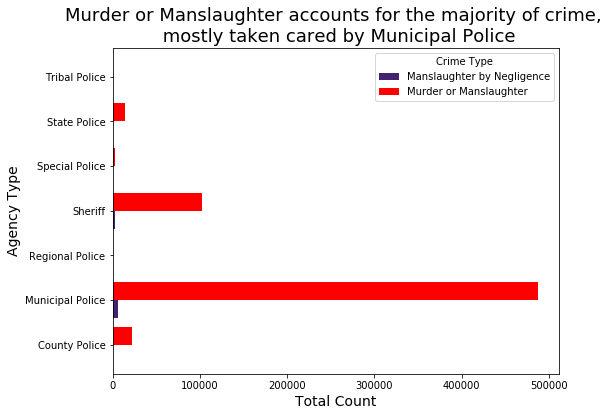

In [120]:
ct.plot(kind='barh', 
         #stacked=True, 
         color=['#432371','red'],
         width=0.8,  
         figsize=(8,6) # (x-axis,y-axis)
         )
plt.xlabel('Total Count',size=14)
plt.ylabel('Agency Type',size=14)
plt.title('Murder or Manslaughter accounts for the majority of crime, \n mostly taken cared by Municipal Police',size=18)
plt.show() 

As we have defined above in the business description, murder occurs when one human being unlawfully kills another human being which is much more severe than Manslaughter. Thus our analysis of give dataset shows that majority of violence from 1980-2014 were serious murder or manslaughter. We can also see that most of these violences are handled by Municipal Police Department.   


In [123]:
# Check to see which race of population who are victim of crime based on race.
crosstab_vict_race_sex = pd.crosstab(df_categorical_var['Victim Race'],
                         df_categorical_var['Victim Sex'],
                        margins=True,
                        margins_name='Total',
                        normalize='columns').round(3)*100  

In [124]:
crosstab_vict_race_sex

Victim Sex,Female,Male,Unknown,Total
Victim Race,,,,
Asian/Pacific Islander,2.1,1.4,0.2,1.5
Black,36.3,50.1,4.2,47.0
Native American/Alaska Native,0.8,0.7,0.1,0.7
Unknown,0.9,0.9,89.9,1.0
White,59.8,46.9,5.6,49.7


As you can see from the table above that, majority of people who were victim of crime were of white race,<font color='red'> 50%</font>.
Another interesting thing from this is that white female were the highest victim of crime among all the 
women of different race, <font color='red'>59.8%</font>. 

In [125]:
crsstab_crimeTp_wepn = pd.crosstab(df_categorical_var['Weapon'],
                              df_categorical_var['Crime Type'],
                 margins=True,
                  margins_name='Total',
                 normalize=True, 
                 ).round(3)*100 

In [126]:
crsstab_crimeTp_wepn

Crime Type,Manslaughter by Negligence,Murder or Manslaughter,Total
Weapon,,,
Blunt Object,0.1,10.4,10.5
Drowning,0.0,0.2,0.2
Drugs,0.0,0.2,0.2
Explosives,0.0,0.1,0.1
Fall,0.0,0.0,0.0
Fire,0.0,0.9,1.0
Firearm,0.1,7.3,7.4
Gun,0.0,0.3,0.3
Handgun,0.6,49.2,49.7


<font color='red'>98.6%</font> of crime were <b>Murder or Manslaughter</b> with almost <font color='red'>50%</font> of them committed using Handgun.

### 4.2 Dummy Code <a id='dummy-code'></a>
<div style="text-align: right"><a href="#new-feature-creation">New Feature Creation</a></div>
<hr/>

In [73]:
df_imputed[df_imputed['Perpetrator Age']==0 ]

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Victim_Age_Group,Perpetrator_Age_Group,Relationship_Group
2,3.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2.0,Murder or Manslaughter,0,Female,30.0,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI,21-30,0-10,Unknown
4,5.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2.0,Murder or Manslaughter,0,Female,30.0,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI,21-30,0-10,Unknown
8,9.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2.0,Murder or Manslaughter,0,Male,32.0,White,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Firearm,0,0,FBI,31-40,0-10,Unknown
10,11.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,1.0,Murder or Manslaughter,0,Male,36.0,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI,31-40,0-10,Unknown
14,15.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,August,2.0,Murder or Manslaughter,0,Male,48.0,White,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI,41-50,0-10,Unknown
26,27.0,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,February,1.0,Murder or Manslaughter,0,Male,27.0,Black,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI,21-30,0-10,Unknown
32,33.0,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,July,1.0,Murder or Manslaughter,0,Male,25.0,White,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI,21-30,0-10,Unknown
33,34.0,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,July,2.0,Murder or Manslaughter,0,Male,24.0,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI,21-30,0-10,Unknown
34,35.0,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,July,3.0,Murder or Manslaughter,0,Male,33.0,White,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Firearm,0,0,FBI,31-40,0-10,Unknown
38,39.0,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,October,2.0,Murder or Manslaughter,0,Female,22.0,White,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Firearm,0,0,FBI,21-30,0-10,Unknown


In [75]:
df_imputed.shape 

(638454, 27)

In [76]:
216327/638454 

0.3388294223232997

## 6. Visualizations Attributes <a id='visualizations'></a>
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>

<b>Visualizing single attributes</b>  

In [129]:
sns.set_style("whitegrid") # set the sns char style 

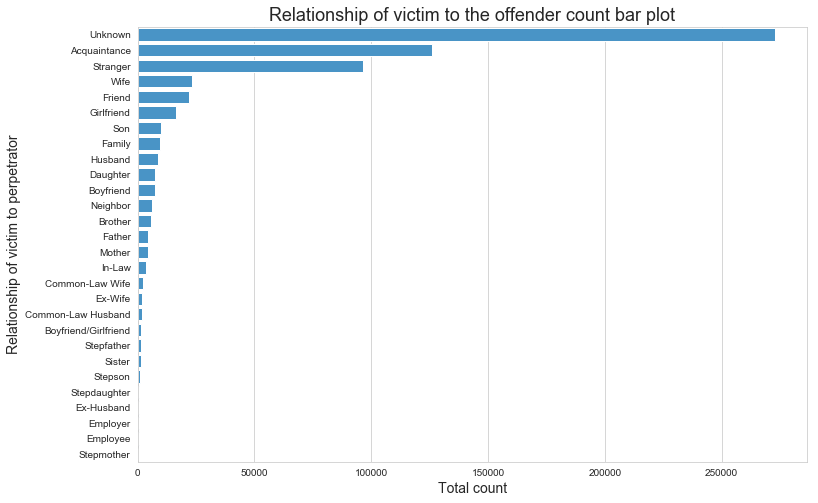

In [131]:
#source code: https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count/46624802
f,ax = plt.subplots(figsize=(12,8)) # size  of the plot. 
sns.countplot(y='Relationship',
              order=df_imputed['Relationship'].value_counts().index,  # order the bars 
               data = df_imputed,
                color='#3498DB') 
plt.xlabel('Total count',size=14)
plt.ylabel('Relationship of victim to perpetrator',size=14)
plt.title('Relationship of victim to the offender count bar plot',size=18) 
plt.show() 

Of all the crime that were recorded we can see that majority of relationship of victim to the offender were unknown which according to attribute description means can not be determined. Which could be possible that the agency had no record of relationship. 

The other two most occurrence are Acquaintance and stranger which is most likely that offender were killing innocent people. 

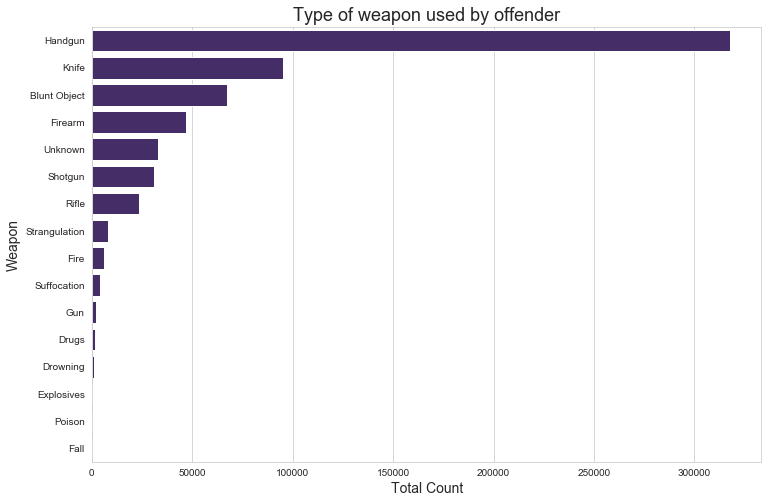

In [132]:
f, ax = plt.subplots(1,1,figsize=(12,8))
sns.countplot(y='Weapon',
               order=df_imputed['Weapon'].value_counts().index,
              data=df_imputed,
              color='#432371') 
plt.xlabel('Total Count',size=14)
plt.ylabel('Weapon',size=14)
plt.title('Type of weapon used by offender',size=18) 
plt.show() 

We were interested in knowing the most used weapon by perpetrator. In the plot above we can see that Handgun was the favorite weapon of majority of offender followed by knife. And it could be because of large production, according to bureau of justice statistics the number of gun produced in 1993 was 80% higher than in 1973. Another reason its that 
many of these perpetrator used stolen guns as a source of weapons. A research conducted by the Virginia Department of Criminal Justice Services showed that in 1992 and 1993, 15 % of the adult offender and 19% of the juvenile offender had stolen guns. FBI also reported that from 1985 to 1994 they had an annual average of over 274,000 reports of stolen guns. Hence we can see why handgun were used the most.

source: https://www.bjs.gov/content/pub/pdf/GUIC.PDF


### Visualizing Multiple Attributes 

In [133]:
#Grouping by year, aggregating sum and displaying two features victim count and Perpetrator Count
df2 = df_imputed.groupby(by=['Year'])['Victim Count','Perpetrator Count'].sum().reset_index() 

In [135]:
df2.head(2) 

,Year,Victim Count,Perpetrator Count
0,1980,2410,4237
1,1981,2118,2823


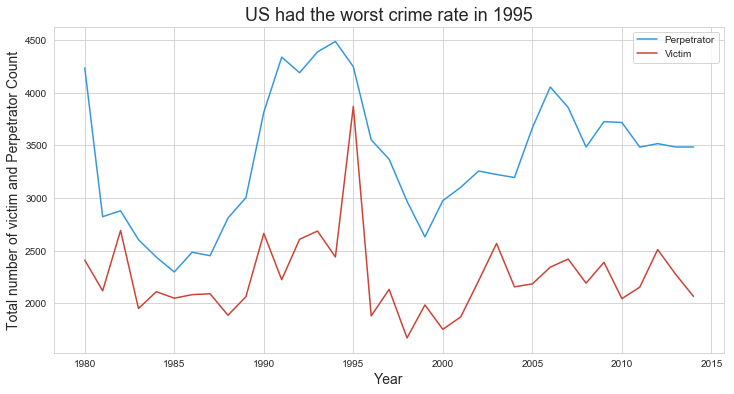

In [136]:
plt.figure(figsize=(12,6))
plt.plot(df2.Year,df2['Perpetrator Count'],color='#3498DB',label='Perpetrator')
plt.plot(df2.Year,df2['Victim Count'],color='#CB4335',label='Victim')
#plt.plot(vp.year,vp['Incident'],color='green',label='Incident')
plt.title('US had the worst crime rate in 1995',size=18)
plt.legend() 
plt.xlabel('Year',size=14)
plt.ylabel('Total number of victim and Perpetrator Count',size=14)
plt.show()

There was sharp drop in the total number  of perpetrator and victim in 1985 followed by sharp increase in the national crime rate in the year between 1990 and 1997. In the plot above we can notice that crime rate were very high in year 1990-1997. There is a small increase in 2005 and 2006 and then resumes its downward trend until around 2015. 




In [145]:
#df3 = df_imputed.groupby(by=['Year']).mean().reset_index() 

In [147]:
# plt.figure(figsize=(12,6))
# # plt.plot(vp.Year,vp['Perpetrator Count'],color='#3498DB',label='Perpetrator')
# # plt.plot(vp.Year,vp['Victim Count'],color='#CB4335',label='Victim')
# plt.plot(df3.Year,df3['Perpetrator Age'],color='#432371',label='Average perpetrator age')  
# plt.title('Average age of Perpetrator involved in criminal \n activity in between 1995-2007 were teenager group',size=18)
# plt.legend()
# plt.xlabel('Year',size=14)
# plt.ylabel('Average age of Perpetrator',size=14)
# plt.show() 

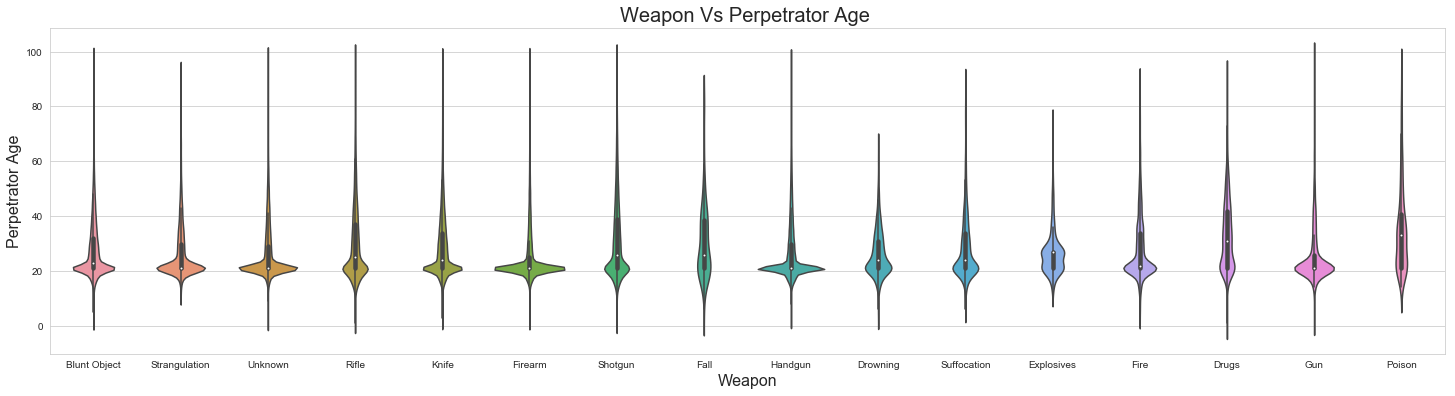

In [148]:
# Visualizing Perpetrator age vs prepered weapon
plt.figure(figsize=(25,6));
wepon_vplot = sns.violinplot(y=df_imputed['Perpetrator Age'],
                             x = df_imputed['Weapon'],
                             dodge=True)
plt.title('Weapon Vs Perpetrator Age ',size=20)
plt.xlabel('Weapon',size=16)
plt.ylabel('Perpetrator Age',size=16) 
plt.show() 


In the plot above we can see that the preferred weapon of choice for many teenage perpetrator is Handgun.

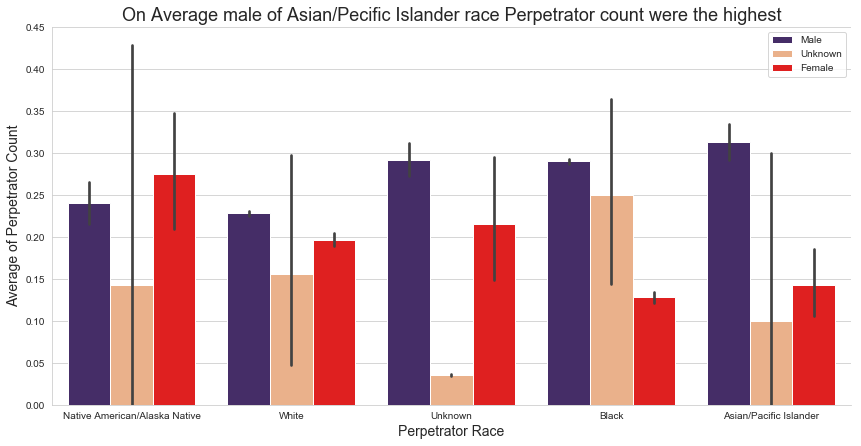

In [150]:
sns.catplot(x='Perpetrator Race',
           y='Perpetrator Count',
           kind='bar', 
           height=6,
            aspect=2,
            hue='Perpetrator Sex', 
            palette=['#432371',"#FAAE7B",'red'],
            legend=False,
           data=df_imputed)
plt.xlabel('Perpetrator Race',size=14)
plt.ylabel('Average of Perpetrator Count',size=14)
plt.title('On Average male of Asian/Pecific Islander race Perpetrator count were the highest',size=18)
plt.legend() 
plt.show() 


We found out that perpetrator of <b>Asian/Pacific Islander</b> and mostly  <font color='#432371'><b>male</b></font> worked in a group of additional perpetrator when carrying out criminal activities. As you can see in the graph above that the average perpetrator count is highest for the Asian/Pacific Islander. Another interesting thing from above bar plot is that <font color=' red'>Native American/ Alaska Native women</font> are among the highest to work group to carryout criminal activities compared to women of other race. 

## 7. Exploratory Data Analysis <a id='exploratory-data-analysis'></a>
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>

## 8. Discoveries <a id='discoveries'></a>
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>

#### Explore Attributes and Class
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

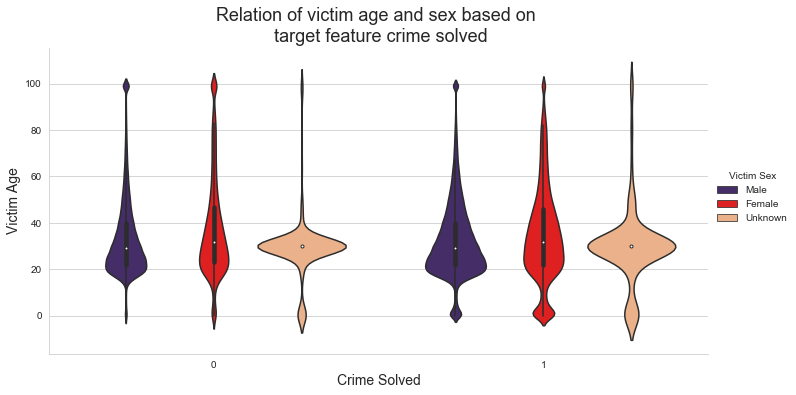

In [152]:
vil_plot = sns.catplot(y='Victim Age',
            x= 'Crime Solved',
            hue='Victim Sex',
            palette=['#432371','red',"#FAAE7B"], 
            height= 5,
            aspect=2, 
            kind='violin',  
            data=df_imputed)
plt.xlabel('Crime Solved',size=14)
plt.ylabel('Victim Age',size=14)
plt.title('Relation of victim age and sex based on \n target feature crime solved',size=18) 
plt.show() 

From above violin plot we can see that median age of female victim whose crime has been solved is higher than other gender. 
We can also notice that median age of victim with unknown sex is much lower than male and female regardless of crime solved or unsolved. Which indicates that majority of unknown victim are very young. 

The shape of distribution with extremely think on each end and fat in the middle suggests that the victim age for both solved and unsolved crime are concentrated around the median. 

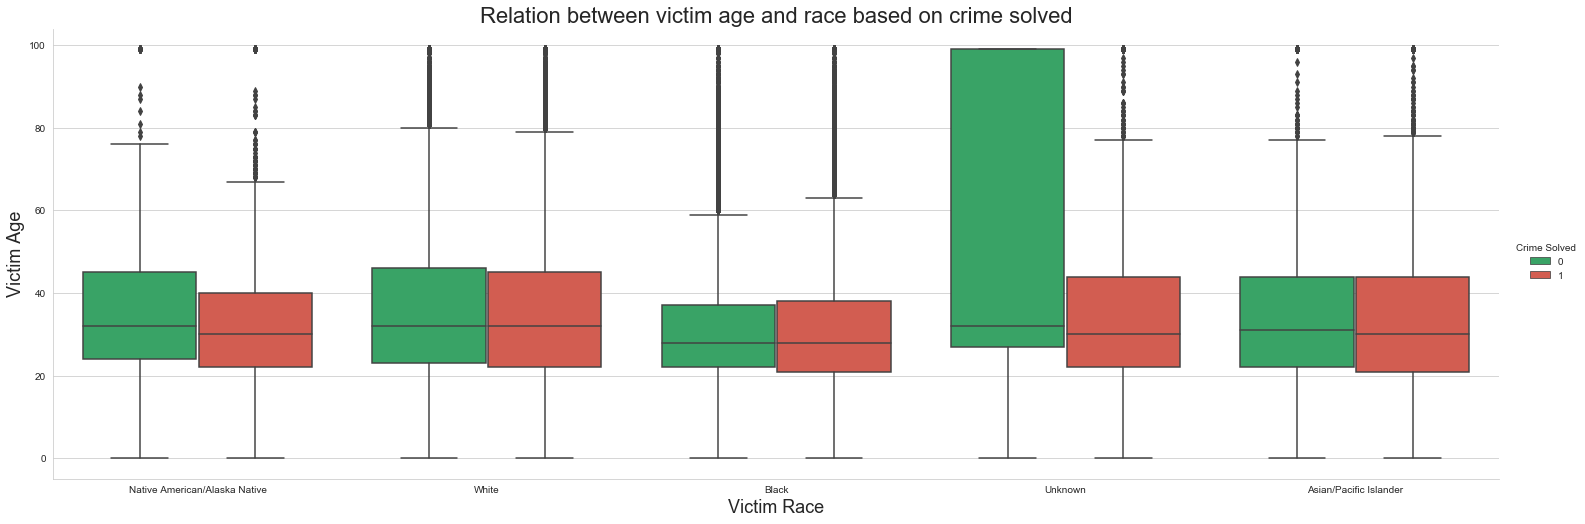

In [153]:
sns.catplot(y='Victim Age',
            x = 'Victim Race',
            hue='Crime Solved',
            palette=['#28B463','#E74C3C'],
            kind = 'box',
            height=7,
            aspect=3, 
            data= df_imputed)
plt.xlabel('Victim Race',size=18)
plt.ylabel('Victim Age',size=18)
plt.title('Relation between victim age and race based on crime solved',size=22) 
plt.show() 

We can see that median age of victim regardless of crime solved or unsolved is between 25-35. Number of crime unsolved for native American and Asian are slightly higher than other race. Also, black victims are of younger age compared to other.

## 9. Exceptional Work <a id='exceptional-work'></a>
<div style="text-align: right"><a href="#index">index</a></div>
<hr/>

### 9.1 Downsampling the Data <a id='downsampling-data'><a/>
<div style="text-align: right"> <a href="#exceptional-work">Exceptional Work</a> </div>

### 9.2 PCA <a id='pca'><a/>
<div style="text-align: right"> <a href="#exceptional-work">Exceptional Work</a> </div>

### 9.3 Feature Selection <a id='feature-selection'><a/>
<div style="text-align: right"> <a href="#exceptional-work">Exceptional Work</a> </div>

### 9.4 Logistic Regression <a id='logistic-regression'><a/>
<div style="text-align: right"> <a href="#exceptional-work">Exceptional Work</a> </div>

'/Users/ghimirek/ML1Lab1/ML1-Visualization-and-Data-Preprocessing/Lab 1/Jupyter Notebooks'